In [1]:
import os
import time
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import gym

In [3]:
env_name = 'Breakout-v0'
env = gym.make(env_name)

In [4]:
env.action_space.sample()

3

In [5]:
env.action_space.n

4

In [6]:
env.observation_space.shape

(210, 160, 3)

In [7]:
state = env.reset()
state.shape

(210, 160, 3)

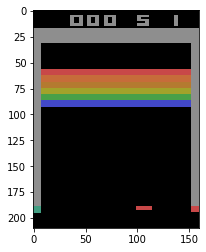

In [8]:
plt.imshow(state)

**Convert RGB to GRAY**

In [9]:
gray = np.mean(state, axis=2)
gray.shape

(210, 160)

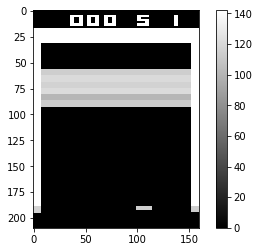

In [10]:
plt.imshow(gray, cmap='gray')
plt.colorbar()

**Resize (down-sample) image**

In [11]:
down_sample = gray[::2, ::2]
down_sample.shape

(105, 80)

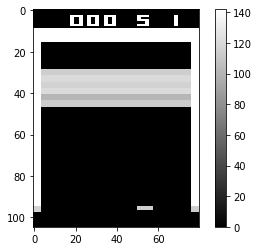

In [12]:
plt.imshow(down_sample, cmap='gray')
plt.colorbar()

**Convert to 0 or 255** 

In [13]:
abs_img = np.where(down_sample == 0, 0, 255).astype(np.uint8)
abs_img.shape

(105, 80)

In [14]:
abs_img.dtype

dtype('uint8')

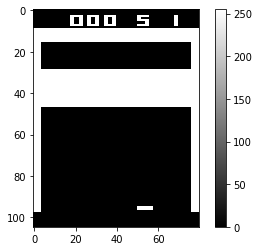

In [15]:
plt.imshow(abs_img, cmap='gray')
plt.colorbar()

**Wrap all together**

In [16]:
def process_state(img):
    _img = np.mean(img, axis=2, dtype=np.uint8)
    _img = _img[::2, ::2]
    _img = np.where(_img==0, 0, 255).astype(np.uint8)
    return _img

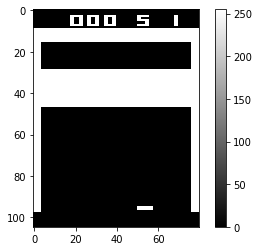

In [17]:
plt.imshow(process_state(state), cmap='gray')
plt.colorbar()

In [18]:
_state = process_state(state)
_state.shape

(105, 80)

In [19]:
state.dtype

dtype('uint8')

In [20]:
_state.dtype

dtype('uint8')

In [21]:
state_memory = []

In [22]:
for _ in range(64):
    action = env.action_space.sample()
    observation = env.step(action)
    state, reward, done, info = observation
    _state = process_state(state)
    state_memory.append(_state)

In [23]:
len(state_memory)

64

In [24]:
idx = 0

1


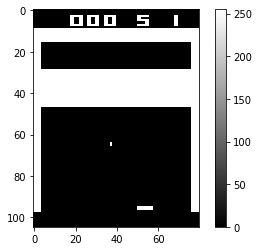

In [25]:
idx %= len(state_memory)
idx += 1
print(idx)
plt.imshow(state_memory[idx], cmap='gray')
plt.colorbar()

**Grab sequence of frames**

In [26]:
seq_states = np.array(state_memory[20:30])
seq_states.shape

(10, 105, 80)

In [27]:
seq_states.dtype

dtype('uint8')

**Merge them together**

In [28]:
max_seq_states = np.max(seq_states, axis=0)
max_seq_states.shape

(105, 80)

In [29]:
max_seq_states.dtype

dtype('uint8')

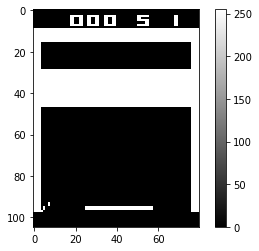

In [30]:
plt.imshow(max_seq_states, cmap='gray')
plt.colorbar()

**Fade frame**

In [31]:
process_seq_state = []

for idx, s in enumerate(seq_states):
    # fade past images
    alpha = idx / len(seq_states)
    s = s * alpha
    process_seq_state.append(s)

process_seq_state = np.array(process_seq_state, dtype=np.uint8)
process_seq_state = np.max(process_seq_state, axis=0)

In [32]:
process_seq_state.shape

(105, 80)

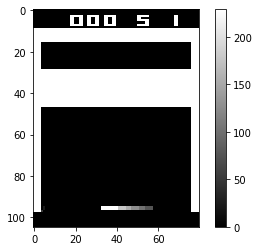

In [33]:
plt.imshow(process_seq_state, cmap='gray')
plt.colorbar()

In [34]:
def ray_trace(seq_images):
    process_seq = []

    for idx, s in enumerate(seq_images):
        s = s * ((idx+1) / len(seq_images))
        process_seq.append(s)
    process_seq = np.array(process_seq, dtype=np.uint8)
    ray_trace_image = np.max(process_seq, axis=0)
    return ray_trace_image

In [35]:
idx = 60
# grab `x` sequential frames
x = 8
ray_trace_image = ray_trace(state_memory[idx-8:idx])
ray_trace_image.shape

(105, 80)

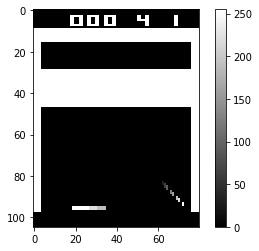

In [36]:
plt.imshow(ray_trace_image, cmap='gray')
plt.colorbar()

**Tranditional Q-Learning update equation**

$Q_{s,a} \leftarrow (1 - \alpha) Q_{s,a} + \alpha (reward + \gamma \max(Q_{s'})$

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model_filename = f'{env_name}.h5'
model_filename

In [ ]:
model = keras.models.load_model(model_filename)
model.summary()

Test unpack `input_shape`

In [41]:
(*(105, 80, 1), )

(105, 80, 1)

In [68]:
from dqn_utils import *

**Populate DQN memory**

In [69]:
dqn_memory = DQNMemory()

In [70]:
done = False
state = env.reset()
state = process_state(state)
dqn_memory.start_eps(state)

while not done:
    action = env.action_space.sample()
    observation = env.step(action)

    new_state, reward, done, info = observation

    new_state = process_state(new_state)
    # add new observation to `dqn_memory`
    dqn_memory.add(new_state, action, reward, done)
    
dqn_memory.end_eps()

In [72]:
dqn_memory.get_current_size()

AttributeError: 'DQNMemory' object has no attribute 'get_current_size'

In [60]:
state_list, action_list, reward_list, next_state_list = dqn_memory.sample_memory()

20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 0.5  0.75 1.  ]
20190710_083235 [0.25 

ValueError: Empty stack for 1956

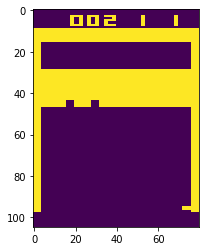

In [62]:
plt.imshow(dqn_memory.states[1956])